In [54]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\arvin\Downloads\learner_results_unfreeze_last_2.csv")

In [47]:
skin_tone_order = ['Very Light', 'Light', 'Tan', 'Intermediate', 'Brown', 'Dark']

df['skin_tone'] = pd.Categorical(df['skin_tone'],
                                          categories=skin_tone_order,
                                          ordered=True)

In [55]:
target_percentages = (
    df.groupby('skin_tone', observed=False)['target']
    .mean()
    .mul(100)
    .round(2)
    .rename('error_percentage')
)

overall_error_percentage = (
    df['target'].mean() * 100
).round(2)

print("Error percentage by skin tone:\n")
print(target_percentages)
print("\nOverall error percentage:")
print(f"{overall_error_percentage}%")


Error percentage by skin tone:

skin_tone
Brown           14.95
Dark            16.21
Intermediate    18.58
Light            2.56
Tan             19.74
Name: error_percentage, dtype: float64

Overall error percentage:
16.64%


In [49]:
df_positive = df[df['target'] == 1]


error_counts = df_positive['skin_tone'].value_counts().reindex(skin_tone_order)


total = len(df)


summary = pd.DataFrame({
    'Error Count': error_counts,
    'Percentage of Total Dataset': (error_counts / total * 100).round(2)
})

print(summary)

              Error Count  Percentage of Total Dataset
skin_tone                                             
Very Light              0                         0.00
Light                   1                         0.05
Tan                   106                         5.39
Intermediate           47                         2.39
Brown                 132                         6.72
Dark                   41                         2.09


In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

valid_groups = []
invalid_group_names = []

# Grouping by 'skin_tone' and checking for valid groups
for name, group in df.groupby('skin_tone', observed=False):
    targets = group['target'].dropna().values
    if len(targets) >= 2:
        valid_groups.append(targets)
    else:
        invalid_group_names.append(name)

# Perform Chi-Square test if there are at least 2 valid groups
if len(valid_groups) >= 2:
    # Create a contingency table for the Chi-Square test
    contingency_table = pd.crosstab(df['skin_tone'], df['target'])
    
    # Chi-square test of independence
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
else:
    print("Not enough valid groups to run the Chi-Square test.")

# Print groups that were skipped due to insufficient data
if invalid_group_names:
    print("\nGroups skipped due to insufficient data (< 2 non-null target values):")
    for name in invalid_group_names:
        print(f"- {name}")



Chi-Square Statistic: 11.8276
P-value: 0.0187
Degrees of Freedom: 4
Expected Frequencies:
[[ 32.50992366   6.49007634]
 [447.63664122  89.36335878]
 [210.89770992  42.10229008]
 [736.05801527 146.94198473]
 [210.89770992  42.10229008]]

Groups skipped due to insufficient data (< 2 non-null target values):
- Very Light


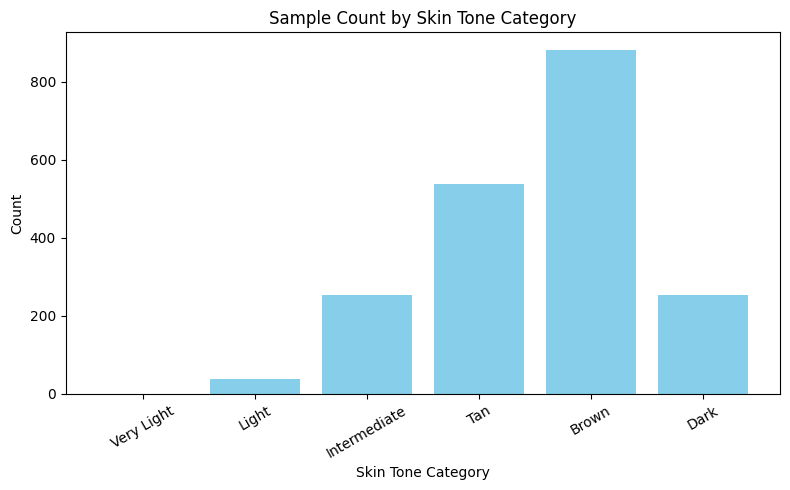

In [7]:
import matplotlib.pyplot as plt

# Count the number of samples per skin tone category
skin_tone_counts = df['skin_tone'].value_counts().reindex([
    'Very Light', 'Light', 'Intermediate', 'Tan', 'Brown', 'Dark'
])

# Plot
plt.figure(figsize=(8, 5))
plt.bar(skin_tone_counts.index, skin_tone_counts.values, color='skyblue')

plt.title('Sample Count by Skin Tone Category')
plt.xlabel('Skin Tone Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation of sex vs target)
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform chi-squared test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Chi-squared Statistic: 0.6453
P-value: 0.4218


In [51]:
import numpy as np

def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age <= 29:
        return 'twenties'
    elif 30 <= age <= 39:
        return 'thirties'
    elif 40 <= age <= 49:
        return 'forties'
    elif 50 <= age <= 59:
        return 'fifties'
    elif 60 <= age <= 69:
        return 'sixties'
    elif 70 <= age <= 79:
        return 'seventies'
    else:
        return 'eighties'


df['age_range'] = df['age'].apply(categorize_age)

age_order = ['teen', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties']

df['age_range'] = pd.Categorical(df['age_range'],
                                          categories=age_order,
                                          ordered=True)


In [53]:
from scipy.stats import chi2_contingency
import pandas as pd

valid_groups = []
invalid_group_names = []

# Grouping by 'skin_tone' and checking for valid groups
for name, group in df.groupby('age_range', observed=False):
    targets = group['target'].dropna().values
    if len(targets) >= 2:
        valid_groups.append(targets)
    else:
        invalid_group_names.append(name)

# Perform Chi-Square test if there are at least 2 valid groups
if len(valid_groups) >= 2:
    # Create a contingency table for the Chi-Square test
    contingency_table = pd.crosstab(df['age_range'], df['target'])
    
    # Chi-square test of independence
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_val:.8f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
else:
    print("Not enough valid groups to run the Chi-Square test.")

# Print groups that were skipped due to insufficient data
if invalid_group_names:
    print("\nGroups skipped due to insufficient data (< 2 non-null target values):")
    for name in invalid_group_names:
        print(f"- {name}")

Chi-Square Statistic: 41.9807
P-value: 0.00000019
Degrees of Freedom: 6
Expected Frequencies:
[[ 20.83757637   4.16242363]
 [ 88.35132383  17.64867617]
 [225.8793279   45.1206721 ]
 [386.74541752  77.25458248]
 [460.09368635  91.90631365]
 [299.22759674  59.77240326]
 [155.86507128  31.13492872]]

Groups skipped due to insufficient data (< 2 non-null target values):
- teen


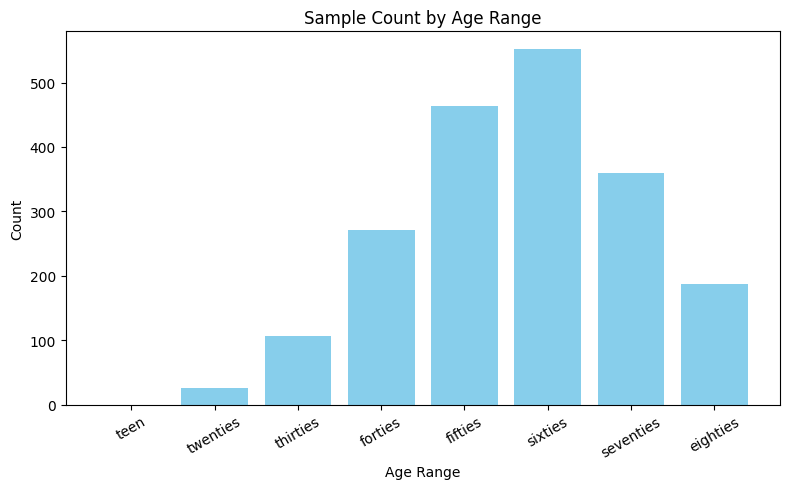

In [10]:
import matplotlib.pyplot as plt

# Count the number of samples per skin tone category
age_counts = df['age_range'].value_counts().reindex(['teen', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties'])

# Plot
plt.figure(figsize=(8, 5))
plt.bar(age_counts.index, age_counts.values, color='skyblue')

plt.title('Sample Count by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import kruskal

valid_groups = []
invalid_group_names = []


for name, group in df.groupby('skin_tone', observed=False):
    targets = group['target'].dropna().values
    if len(targets) >= 2:
        valid_groups.append(targets)
    else:
        invalid_group_names.append(name)


if len(valid_groups) >= 2:
    h_stat, p_val = kruskal(*valid_groups)
    print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
else:
    print("Not enough valid groups to run Kruskal-Wallis test.")


if invalid_group_names:
    print("\nGroups skipped due to insufficient data (< 2 non-null target values):")
    for name in invalid_group_names:
        print(f"- {name}")

Kruskal-Wallis H-statistic: 4.0339
P-value: 0.4014

Groups skipped due to insufficient data (< 2 non-null target values):
- Very Light
